# Probabilidad

Cantidad matemática que nos permite estimar nuestro conocimiento sobre algún evento

In [140]:
#Importemos las librerías de Python
import numpy as np #Matemáticas en general
import matplotlib.pyplot as plt # Gráficas
import matplotlib.mlab as mlab # Más gráficas
from sklearn.neighbors import KernelDensity # Sklearn
from scipy import optimize # Scipy
from scipy.stats import norm # Scipy estadística distribución normal
#from scipy.stats import norm, uniform
import sympy as sym
sym.init_printing(use_latex='mathjax', use_unicode=True)
from IPython.display import display, Math

# LaTeX
plt.rc('font', family='serif')
plt.rc('text', usetex=True)

## Probabilidad Frecuentista

La probabilidad de que obtener $A$ de un evento aleatorio, dado un número $n_T$ repeticiones de dicho evento, es:

$$
    P(A) = \frac{n_A}{n_T},
$$

donde $n_a$ es el número de casos favorables donde sucede A.

### Reglas

- Adición: Si para un evento dado tenemos un conjunto de posibles resultados $A_i$ (donde $i \in [1,\ldots,N]$, la probabilidad conjunta de que obtener cualquiera de esos resultados es:
$$
    P(\cup_i A_i) = \sum_i P(A_i).
$$

- Producto: Si para dicho evento tenemos resultados independientes $A$ y $B$, la probabilidad de obtener $A$ y $B$ se calcula como:
$$
    P(A\cap B)= P(A)P(B). 
$$

## Variables Discretas

Ejemplos:
- Lanzar una moneda.
- Lanzar un dado.

Para una variable discreta $X_i$ tenemos una distribución de probabilidad $p(X_i)$, asociada a todos los posibles valores de dicha variable. La probabilidad de que $X_i$ aparezca dentro de un intervalo $[a,b]$ es:
$$
    P(a\leq X_i \leq b) = \sum_{i=a}^b p(X_i).
$$

Si tenemos $N$ posibles valores para la variable $X_i$, la distribución de probabilidad cumple:
$$
    \sum_{i=1}^N p(X_i) = 1.
$$

## Variables Contínuas

Ejemplos:
- Eventos que suceden a lo largo del tiempo.
- Velocidades en las partículas de un gas.

Para una variable contínua $x$ tenemos una densidad de probabilidad $p(x)$, que es una función contínua asociada a todo el dominio donde esté definida $x$. La probabilidad de encontrar a $x$ dentro de un intervalo $[\xi,\chi]$ es:
$$
    P(\xi \leq x \leq \chi) = \int_{\xi}^{\chi} p(x) \, \mathrm{d}x.
$$

Si $x$ está definida en todo el intervalo $[a,b]$, la densidad de probabilidad cumple:
$$
    \int_a^b p(x) \, \mathrm{d}x = 1.
$$


## Definiciones importantes

- Valor esperado de x ($media$):
$$
    E[x] = \mu = \int_a^b x p(x) \, \mathrm{d}x.
$$

- Segundo momento:
$$
    E[x^2] = \int_a^b x^2 p(x) \, \mathrm{d}x.
$$

- Varianza:
$$
    Var[x] = \sigma^2 = E[(x-\mu)^2] = \int_a^b (x-\mu)^2 p(x) \, \mathrm{d}x = E[x^2] - \mu.
$$

donde $\sigma$ es la Desviación Estándar.

Si tenemos dos variables independientes $x$ y $y$, podemos saber que tan relacionadas están usando:

- Covarianza:
$$
    Cov[x,y] = E[(x-E[x])(y-E[y])] = E[xy] - E[x]E[y].
$$

- Correlación:
$$
    Corr[x,y] = \frac{Cov[x,y]}{\sqrt{Var[x]Var[y]}}.
$$

## Probabilidad Bayesiana

La probabilidad frecuentista no toma en consideración diversos factores que puedan afectar a un siguiente resultado, sólo toman encuenta la frecuencia del evento. Por otro lado, la probabilidad Bayesiana, no sólo considera la frecuencia del evento, sino que también asigna una probabilidad a priori sobre la hipótesis que se piensa responder. 

Ejemplo:

Supongamos que aparece una nueva enfermedad muy rara que afecta 0.1\% de la población. Entonces nos hacemos una prueba, la cual el laboratorio asegura que de cada 100 casos, solamente 1 es un falso positivo, y a nosotros nos sale resultado positivo, ¿cuál es la probabilidad de que, en efecto, tengamos esta enfermedad dado a que el resultado fue positivo?

Según la probabilidad frecuentista, sólo es necesario considerar la eficacia de la prueba, por lo que la probabilidad de tener la enfermedad sería del 99\%.

Usando la probabilidad bayesiana, debemos de preguntarnos ¿cuál es la probabilidad de tener esa enfermedad, en general? Sin importar, por el momento, el resultado de la prueba. La respuesta a esta pregunta, es un conocimiento independiente.

La probabilidad de estar enfermos dado a que el resultado de la prueba fue positivo la denotaremos como $P(S|+)$ donde $S$ hace referencia a que SI tenemos la enfermedad, y el signo $+$ hace referencia a que la prueba dio positiva. Este es el valor que queremos encontrar. El Teorema de Bayes nos dice que:

$$
    P(S|+) = \frac{P(+|S)P(S)}{P(+)},
$$

donde $P(S)$ es la probabilidad de tener la enfermedad, en general; $P(+)$ es la probabilidad de que la prueba haya dado positivo, en general; y $P(+|S)$ es la probabilidad de que la prueba diera positivo dado a que sí estamos enfermos.

- Si sólo al 0.1\% de la población le da la enfermedad, entonces la probabilidad de tenerla nosotros, en general, es $P(S) = 0.001$. A esta se le conoce como la probabilidad a priori.
- La probabilidad de que salga positivo el test, dado a que si tenemos la enfermedad es justo la confiabilidad de la prueba $P(+|S) = 0.99$.
- La probabilidad de que el test salga positivo es una probabilidad conjunta de que salga positivo dado a que si tenemos la enfermedad, o que salga positivo dado a que fue un falso positivo. Entonces $P(+) = P(+|S)P(S) + P(+|N)P(N) = 0.99(0.00001) + 0.01(1-0.00001)$.

De esta forma tenemos que:

$$
    P(S|+) = \frac{0.99(0.001)}{0.99(0.001) + 0.01(1-0.001)} \approx 0.09 = 9\%.
$$

Este resultado tiene bastante sentido cuando piensas en, justamente, lo raro que sería de verdad tener la enfermedad, porque pues sólo le da al 0.1\%, i.e., una persona de cada 1000 habitantes. No es común, y si no sabemos nada más de la enfermedad, ni como se transimite ni nada, pues tiene sentido que la probabilidad real de teneral sea el 9\%, ya que es más probable que la prueba se haya equivocado a ser ese 1 en 1000. Si supieramos algo más de la enfermedad como, por ejemplo, el SIDA, sabemos cómo se transmite, etc. Tendríamos que considerar diversos factores como: haber tenido sexo sin protección, número de parejas sexuales en los últimos meses, etc., y eso ya aumenta mucho más la probabilidad real de tener la enfermedad dado a que el resultado de la prueba es positivo.

Si nos hacemos ahora una segunda prueba y vuelve a dar positivo, aplicamos nuevamente el Teorema de Bayes pero ahora $P(S)$ se convierte en la probabilidad a posteriori, que es justo la que calculamos anteriormente 9\%. Si hacemos nuevamente el cálculo con esta modificación obtenemos:

$$
    P(S|+) = \frac{0.99(0.09)}{0.99(0.09) + 0.01(1-0.09)} \approx 0.91 = 91\%.
$$

Ahora sí ya podríamos estar más seguros de que sí, estamos enfermos.



## Distribuciones de Probabilidad (PDF)

La distribución de probabilidad, o "probability density function", cumple que:

$$
    \int_{-\infty}^\infty p(x) \, \mathrm{d}x = 1
$$

# Distribución Uniforme

La distribución de probabilidad en un dado o una moneda (casos discretos).
La distribución de probabilidad de que yo diga una babosada como función del tiempo (caso continuo).

$$
f(x) = \left\lbrace 
\begin{array}\\
\frac{1}{b-a} &\text{for } a \leq x \leq b, \\
0 &\text{for } x < a \text{ or } x > b
\end{array}
\right.
$$

In [141]:
# Creamos la distribución
def uniform(x,b,a):
    return np.ones_like(x)/(b-a)

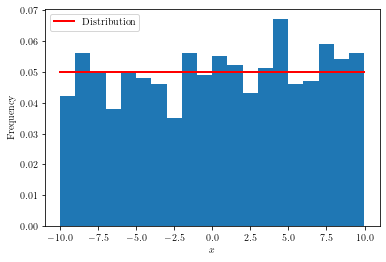

In [142]:
# Límites del intervalo donde está definida nuestra
# distribución
b =   10
a =  -10

# Semilla random para que siempre salga la misma
# distribución
np.random.seed(19680801)

# Creamos una distribución uniforme
s = np.random.uniform(a,b,1000)

# Graficamos con pyplot (plt) el histograma de la distribución
count, bins, ignored = plt.hist(s, 20, density=True)

# Distribución real
plt.plot(bins, uniform(bins,b,a), linewidth=2, color='r',label='Distribution')
plt.xlabel('$x$')
plt.ylabel('Frequency')
plt.legend()

## Distribución Normal o Gaussiana

- Para las velocidades de las partículas de un gas en equilibrio.
- El comportamiendo de la gente.

$$
f(x|\mu,\sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp{\left( - \frac{(x - \mu)^2}{2\sigma^2} \right)}
$$

In [143]:
# Creamos la distribución
def gauss(x,mu,sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )

(0.0, 100.0)

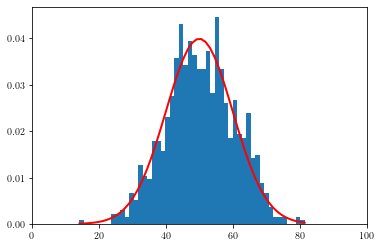

In [144]:
# Definimos los parámetros mu y sigma
# que son la media y desviación estándar
media, sigma = 50, 10

# Puntos aleatorios distribuidos de manera normal (gaussiana)
data = np.random.normal(media, sigma, 1000)

# Histograma
count, bins, ignored = plt.hist(data, bins=50, density=True)

# Distribución real
plt.plot(bins, gauss(bins,media,sigma),
         linewidth=2, color='r', label='Distribution')
plt.xlim(0,100)

## Ajustando una distribución

Supongamos que tenemos un conjunto de datos que tienen
una distribución que, a ojo, se ve gaussiana

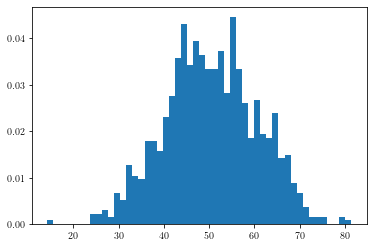

In [145]:
# Datos observados
count, bins, ignored = plt.hist(data, bins=50, density=True)

Supongamos que la distribución que siguen es normal, así
que ajustemos dicha distribución

<IPython.core.display.Math object>

<IPython.core.display.Math object>

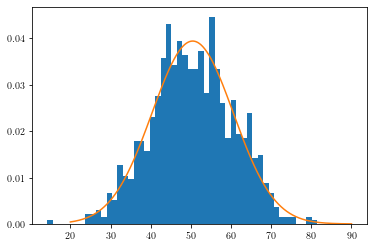

In [146]:
# Un ajuste con una distribución normal a los datos
# usando Scipy.stats.norm.fit
mu, std = norm.fit(data)
display(Math(rf'\text{{Los parámetros son:}}'))
display(Math(rf'\mu = {mu} \, \, \text{{ y }} \, \, \sigma = {std}'))

# Graficamos los datos contra el ajuste
x = np.linspace(20,90,10000)
count, bins, ignored = plt.hist(data, bins=50, density=True)
plt.plot(x,gauss(x,mu,std))


## Ajustando una función más complicada

In [147]:
# Para esto usaremos Scipy.optimize.curve_fit
from scipy.optimize import curve_fit

In [148]:
# Generamos nuestros datos sintéticos a partir de 
# una exponencial y de una gaussiana
# y en lugar de usar plt.hist, haremos una gráfica de barras.
# Esto nos permite acomodar mejor los bins

data  = np.random.exponential(scale=2.0, size=200)
data2 = np.random.normal(3,0.5,size=150)
bins  = np.linspace(0, 6, 61)

In [149]:
# Definimos los centros de los bins, justo para ajustar
# las gráficas de barra. Concatenamos los datos simulados
# de la exponencial y la gaussiana. Generamos el histograma.

binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
data_cat = np.concatenate((data,data2))
data_entries, bins_cat = np.histogram(data_cat,bins=bins,density=True)

<BarContainer object of 60 artists>

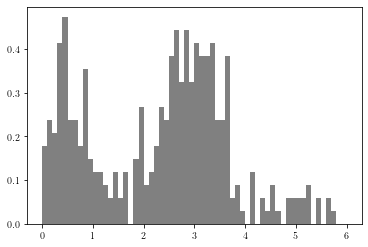

In [150]:
# Plotteamos el histograma con grafica de barra
plt.bar(binscenters, data_entries, width=bins[1] - bins[0], color='gray', label=r'Histogram entries')

In [151]:
# En principio no tendríamos por qué saberlo, pero vamos a
# suponer que la función que ajusta mejor a la distribución es 
# una exponencial con una gaussiana.

def exp_gauss(x, A, beta, B, mu, sigma):
    return (A * np.exp(-x/beta) + B * np.exp(-1.0 * (x - mu)**2 / (2 * sigma**2)))

#### Exponencial + Gaussiana

$$
p(x) = A \exp \left(-\frac{x}{\beta} \right) + B \exp \left(-\frac{(x-\mu)^2}{2\sigma^2} \right)
$$

In [152]:
# Hacemos el fit de nuestra función al histograma.
#p0 = [20000, 2.0, 2000, 3.0, 0.3]
p0 = [0.2, 2.27, 0.49, 2.97, 0.5]
popt, pcov = curve_fit(exp_gauss, xdata=binscenters, ydata=data_entries, p0=p0)

Los parámetros del fit son [0.31355399 1.7212851  0.37160427 3.00733257 0.49105868]


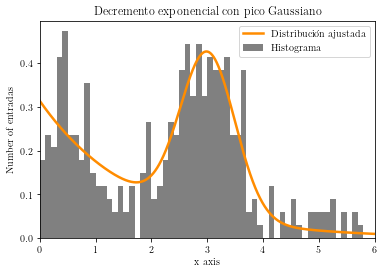

In [153]:
# Y plottemos el histograma junto con el fit
xspace = np.linspace(0, 6, 100000)
plt.bar(binscenters, data_entries, width=bins[1] - bins[0], color='gray', label=r'Histograma')
plt.plot(xspace, exp_gauss(xspace, *popt), color='darkorange', linewidth=2.5, label=r'Distribución ajustada')

plt.xlim(0,6)
plt.xlabel(r'x axis')
plt.ylabel(r'Number of entradas')
plt.title(r'Decremento exponencial con pico Gaussiano')
plt.legend(loc='best')

print("Los parámetros del fit son {}".format(popt))

## Función de Distribución Acumulada (CDF)

La función de distribución acumulada, o "Cumulative distributive function", nos permite de una manera "visualizar" la probabilidad de obtener un resultado abajo de cierto valor de $x$, es decir, $P(x < a)$. Y la podemos escribir como una función.

$$
F(x) = P(X \leq x) = \int_{-\infty}^x p(t) \, \mathrm{d}t.
$$


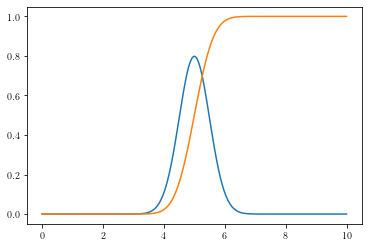

In [154]:
# Ejemplo con una gaussiana simple
# Y usemos Scipy.stats.norm para
# calcular PDF y CDF

x = np.linspace(0,10,10000)

mu  = 5
std = 0.5

plt.plot(x,norm.pdf(x,mu,std))
plt.plot(x,norm.cdf(x,mu,std))

¿Cuál es la probabilidad de encontrar un dato en $x < 7$?

Es probable que tengamos muy pocos datos como para responder esta pregunta, pero dado que tenemos un ajuste para su distribución, podemos lanzar todos los números aleatorios que queramos, usando dicha distribución, y tener simulaciones de datos que nos permitirán estimar mucho mejor dicha probabilidad.

¿Por qué sirve hacer esto? Porque, según el Teorema Central del
Límite, si la cantidad de datos que tenemos tiene a infinito, 
nuestra distribución tiende a una gaussiana.

In [155]:
# Fijamos el número de datos simulados.
N = 100000 

lmax = 7
lmin = 0

# Tiradas Monte-Carlo
prob = 0
for i in range(0,N):
    x = np.random.normal(mu,std)
    
    if x <= lmax and x >= lmin:
        prob += 1
        
print("La probabilidad es {}".format(prob/N))

La probabilidad es 0.99998


## Calculando PDF Y CDF para una distribución arbitraria

### Usando SymPy
Definamos nuestra propia distribución y obtengamos PDF y CFD, desde cero. Ya hay librerías que lo hacen por ti, pero vale la pena intentarlo. Es un buen ejercicio.

In [156]:
from sympy import *

In [157]:
# Definamos nuestra propia distribución.
# En este caso, sólo para comparar, haremos una Gaussiana
# pero puede ser cualquier distribución.

def gaussian_dist(*args,**kwargs):
    x   = args[0]
    mu  = kwargs['mu']
    std = kwargs['std']
    return exp(-(x-mu)**2/(2*std**2))/sqrt(2*pi*std**2)

In [158]:
# Esta clase toma como argumento nuestra distribución
# en este caso, "gaussian_dist" y podemos obtener de ahí
# .pdf(i) o .cdf donde i es cualquier número, así como
# .pdf_array(x) y .cdf_array(x) donde x es un array.

class General_Distribution():
    def __init__(self,dist,rv='x',**kwargs):
        self.dist   = dist
        self.rv     = rv
        self.kwargs = kwargs
    
    def pdf(self,*args):
        return self.dist(*args,**self.kwargs)
    
    def cdf(self,*args):
        t, x = symbols('t x') 
        return lambdify(x,integrate(self.pdf(t),(t,-oo,x)))(*args)
    
    def pdf_array(self,x):
        return np.array([float(self.pdf(i)) for i in x])
    
    def cdf_array(self,x):
        add = []
        pdf = self.pdf_array(x)
        
        dumb = 0
        for i in x:
            dumb += self.pdf(i)*(x.max()-x.min())/len(x)
            add.append(dumb)
            
        return np.array(add)

In [159]:
gaussian = General_Distribution(gaussian_dist,mu=5,std=0.5)

In [160]:
x = np.linspace(0,10,1000)

In [161]:
pdf = gaussian.pdf_array(x)
cdf = gaussian.cdf_array(x)

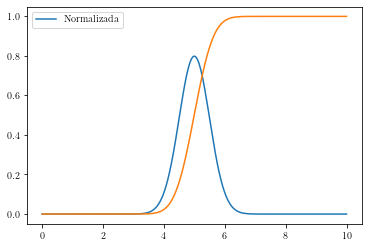

In [162]:
plt.plot(x,pdf,label='Normalizada')
plt.plot(x,cdf)
plt.legend()

### Creando un sample de números aleatorios siguiendo la distribución arbitraria

De aquí también podemos obtener un _sample_ de números aleatorios siguiendo esta distribución. El problema de hacerlo desde cero, como lo estamos haciendo aquí, es que la manera en que se obtiene la muestra de números aleatorios es siguiendo el siguiente procedimiento:

- Definimos PDF: p(x)
- Calculamos $F(x) = \int_{-\infty}^x p(t) \, \mathrm{d}t$
- Para obtener la muestra de puntos que tiene la distribución que queremos, utilizamos $F^{-1}(\chi)$ donde $\chi$ tiene una distribución uniforme entre 0 y 1.

De aquí es claro que obtener la función inversa es complicado en general. Para ciertas funciones conocidas se puede sacar de manera analítica. Sin embargo, si nuestra distribución es muy complicada, es posible que obtener la función inversa sea muy costoso y se tenga que hacer numéricamente, a pesar de que siempre podemos asegurar de que exista. Para hacerlo desde cero tendríamos que utilizar muchas paqueterías y optimizar demasiado nuestra clase.

Afortunadamente Scipy ya tiene una clase que hace lo mismo, pero valía la pena empezarla desde cero.

### Usando SciPy

De aquí utilizamos rv_continuous que es un método que nos permite
calcular facilmente tanto PDF y CDF, como obtener una muestra de números aleatorios, entre otras cosas, y de manera mucho más directa.

In [163]:
from scipy.stats import rv_continuous

In [169]:
# Definamos una clase para la distribución
# Para propósitos de este ejemplo usaremos una gaussiana
# pero puede ser cualquier distribución

# La clase tendrá como argumento rv_continuous, que es
# parte de scitpy.stats. Esto le proporciona a la clase
# objetos de scipy.stats para distribuciones continuas,
# tales como PDF, CDF, muestras de puntos aleatorios, etc.

class gaussian_gen(rv_continuous):
    "Gaussian distribution"
    def _pdf(self, x, mu, std):
        return np.exp(-(x-mu)**2 / (2. * std**2)) / np.sqrt(2.0 * np.pi * std**2)
gaussian = gaussian_gen(name='gaussian',shapes='mu, std')

In [170]:
# Calculamos PDF y CDF

x = np.linspace(0,10,1000)

mu  = 5
std = 0.5

pdf = gaussian.pdf(x,mu,std)
cdf = gaussian.cdf(x,mu,std)

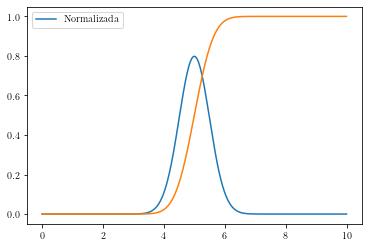

In [171]:
plt.plot(x,pdf,label='Normalizada')
plt.plot(x,cdf)
plt.legend()

In [172]:
# Para hacer un _sample_, por alguna razón, la función
# rvs tiene problemas al ponerle una cantidad fija de datos
# que queremos, pero nos arroja un número aleatorio a la vez 
# muy bien y rápido. Entonces 

N = 1000
dist = [gaussian.rvs(mu,std) for i in range(N)]

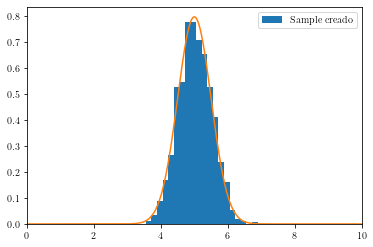

In [173]:
hist = plt.hist(dist,bins=20,density=True,label='Sample creado')
plt.plot(x,pdf)
plt.xlim(0,10)
plt.legend()

### Para distribuciones más complicadas

Hagamos entonces una distribución más complicada

In [174]:
class exp_gauss_gen(rv_continuous):
    "Exponential-Gaussian distribution"
    def _pdf(self, x, A, beta, B, mu, std):
        return (A * np.exp(-x/beta) + B * np.exp(-(x - mu)**2 / (2 * std**2)))
            
exp_gaussian = exp_gauss_gen(name='exp_gaussian',shapes='A, beta, B, mu, std')

In [195]:
# Creamos la distribución

x = np.linspace(0.0001,6,1000)

A    = 0.2
beta = 2.3
B    = 0.1
mu   = 3.5
std  = 0.5

dist = exp_gaussian.pdf(x,A,beta,B,mu,std)

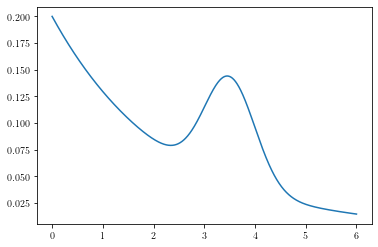

In [196]:
plt.plot(x,dist)

In [197]:
# En este caso tenemos un overflow al calcular la CDF
# no sé bien por qué. Sin embargo podemos calcularla a partir
# de la distribución. Y normalizamos para obtener PDF.

cdf = []
        
dumb = 0
for i in np.arange(len(x)):
    dumb += dist[i]*(x.max()-x.min())/len(x)
    cdf.append(dumb)

# Normalizamos nuestra distribución y calculamos PDF y CDF.
norm = dumb
pdf = dist/norm
cdf = np.array(cdf)/norm

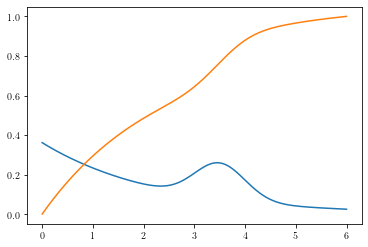

In [198]:
plt.plot(x,pdf)
plt.plot(x,cdf)

In [203]:
# Obtengamos un sample (muestra, distribución) de datos
# aleatorios siguiendo esta distribución.
# Si no es posible obtener un sample usando .rvs debido a overflow
# podemos interpolar la cdf e invertir la función.

from scipy import interpolate

# Interpolamos de manera inversa para obtener f = CDF⁻¹
f = interpolate.interp1d(cdf,x,kind='cubic')

In [204]:
# Ya interpolada la CDF⁻¹, agarramos una distribución uniforme
# de valores entre ~0 y ~1 con 1000 puntos. Y evaluamos en la 
# función 
x_new = np.random.uniform(0.005,0.999,size=1000)
sample = f(x_new)

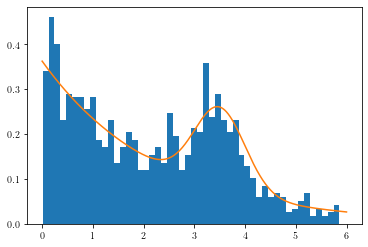

In [206]:
hist = plt.hist(sample,bins=50,density=True)
plt.plot(x,pdf)

## Otra forma de ajustar funciones a distribuciones...

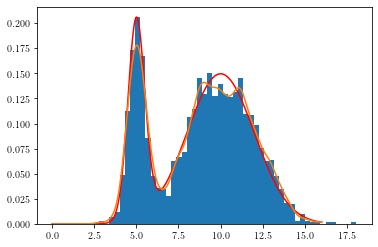

In [38]:
# Generate random samples from a mixture of 2 Gaussians
# with modes at 5 and 10
np.random.seed(19680801)
mu1 = 5
mu2 = 10
sig1 = 0.5
sig2 = 2

f1 = 0.25
f2 = 0.75
N  = 2000

data = np.concatenate((mu1 + sig1*np.random.randn(int(f1*N), 1),
                       mu2 + sig2*np.random.randn(int(f2*N), 1)))


# Plot the data using a normalized histogram
plt.hist(data, 50, density=True)

# Plot the true distribution
x = np.linspace(0, 16, 1000)[:, np.newaxis]
norm_vals = gauss(x, mu1, sig1) * f1 + gauss(x, mu2, sig2) * f2
plt.plot(x, norm_vals,c="red")


# Do kernel density estimation
kd = KernelDensity(kernel='gaussian', bandwidth=0.30).fit(data)

# Plot the estimated densty
kd_vals = np.exp(kd.score_samples(x))
plt.plot(x, kd_vals)

## Distribuciones para dos variables independientes

In [207]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# some random data
x = np.random.randn(1000)
y = np.random.randn(1000)

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, c=np.sqrt(x**2 + y**2))

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins, color='gray')
    ax_histy.hist(y, bins=bins, orientation='horizontal',color='gray')

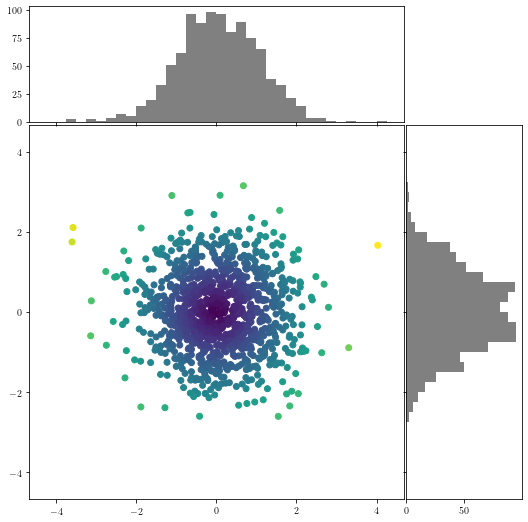

In [208]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(x, y, ax, ax_histx, ax_histy)

$$
P(x,y) = P(x)P(y) = gaussiana(x)gaussiana(y)
$$